# Цели и задачи проекта

## Цель 
Необходимо сопоставить влияние условий жизни учащихся в возрасте от 15 до 22 лет с их успеваемостью по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

## Задача
Необходимо построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

# Поэтапное описание работы

## 1. Первичная обработка данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [2]:
# Загрузка данных
stud = pd.read_csv('stud_math.csv')
stud.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
110,GP,M,15,U,LE3,A,4.0,4.0,teacher,teacher,course,mother,1.0,1.0,0.0,no,no,no,yes,yes,-3.0,yes,NaN,no,5.0,5.0,3.0,4.0,6.0,95.0
325,GP,M,18,U,GT3,T,4.0,4.0,other,other,course,mother,1.0,3.0,0.0,no,no,no,yes,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,3.0,55.0
331,GP,F,17,R,GT3,T,2.0,4.0,at_home,other,course,NaN,1.0,3.0,0.0,no,yes,no,no,yes,-9.0,NaN,yes,yes,4.0,4.0,3.0,5.0,7.0,70.0
266,GP,M,17,U,GT3,NaN,3.0,1.0,services,NaN,other,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,NaN,5.0,4.0,4.0,NaN,2.0,50.0
288,GP,M,18,U,GT3,T,2.0,1.0,services,services,reputation,mother,1.0,3.0,0.0,no,no,yes,yes,yes,-9.0,yes,yes,no,4.0,2.0,4.0,2.0,6.0,70.0
94,GP,M,15,U,LE3,T,2.0,2.0,services,health,reputation,mother,1.0,4.0,0.0,no,yes,no,yes,yes,-12.0,yes,yes,no,NaN,3.0,4.0,4.0,6.0,70.0
354,MS,M,17,NaN,GT3,T,4.0,3.0,services,other,home,mother,2.0,2.0,0.0,no,yes,yes,yes,no,-6.0,yes,yes,yes,4.0,5.0,5.0,2.0,4.0,55.0
337,GP,F,17,U,GT3,T,3.0,2.0,NaN,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,NaN,3.0,2.0,2.0,0.0,0.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

### Самые первые рассуждения и выводы:
- Общее кол-во колонок = 30, из них первоначально:
  * числовых = 13
  * текстовых = 17
  
  Возможно часть текстовых колонок понадобится переделать в числовые как, например, колонку "sex"
- Кол-во колонок без пропусков = 3
- Остальные колонки (27) в большей или меньшей степени имеют пропуски
- Колонка "studytime, granular":
  * для удобства использования необходимо переименовать в колонку "studytime_gran"
  * эта колонка без описания - необходимо догадаться об ее назначении. Если колонка не имеет смысла, ее стоит удалить
- В целом: возможно будут какие-то колонки к удалению

### Первые 3 колонки -  без пропусков

#### 1 school — аббревиатура школы, в которой учится ученик

,school
GP,349
MS,46


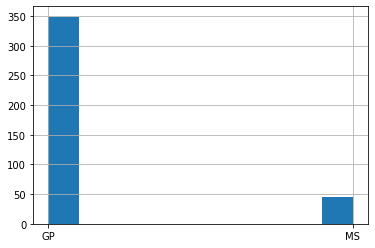

In [4]:
# Уникальные значения и их кол-во
stud.school.hist()
pd.DataFrame(stud.school.value_counts())

school  sex
GP      F      AxesSubplot(0.125,0.125;0.775x0.755)
        M      AxesSubplot(0.125,0.125;0.775x0.755)
MS      F      AxesSubplot(0.125,0.125;0.775x0.755)
        M      AxesSubplot(0.125,0.125;0.775x0.755)
Name: sex, dtype: object

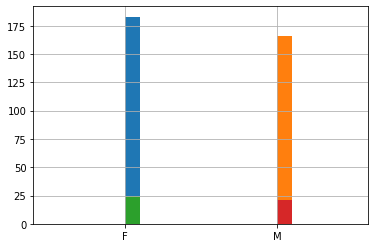

In [5]:
# Распределение вида школ и пола учащихся
stud.groupby(['school', 'sex']).sex.hist()

school  age
GP      15     AxesSubplot(0.125,0.125;0.775x0.755)
        16     AxesSubplot(0.125,0.125;0.775x0.755)
        17     AxesSubplot(0.125,0.125;0.775x0.755)
        18     AxesSubplot(0.125,0.125;0.775x0.755)
        19     AxesSubplot(0.125,0.125;0.775x0.755)
        20     AxesSubplot(0.125,0.125;0.775x0.755)
        22     AxesSubplot(0.125,0.125;0.775x0.755)
MS      17     AxesSubplot(0.125,0.125;0.775x0.755)
        18     AxesSubplot(0.125,0.125;0.775x0.755)
        19     AxesSubplot(0.125,0.125;0.775x0.755)
        20     AxesSubplot(0.125,0.125;0.775x0.755)
        21     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

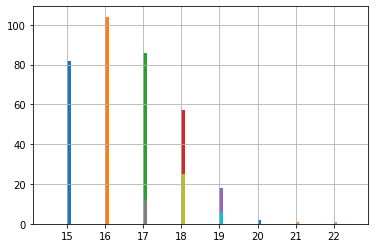

In [6]:
# Распределение вида школ и возраста учащихся
stud.groupby(['school', 'age']).age.hist()

##### Выводы по колонке school:
- Всего 2 вида школ: GP и MS
- Распределение по видам крайне неравномерное. Примерное соотношение GP/MS ~ 8/1
- Распределение вида школ и пола учащихся: примерно равномерное. В каждой школе примерно поровну юношей и девушек с небольшим перевесом в сторону девушек
- Распределение вида школ и возраста учащихся - неравномерное:
  * в школе GP представлены все возрасты с 15 до 22 за исключением возраста 21,
  * в школе MS присутствуют учащиеся только возрастов 17-21 включительно.

#### 2 sex — пол ученика ('F' - женский, 'M' - мужской)

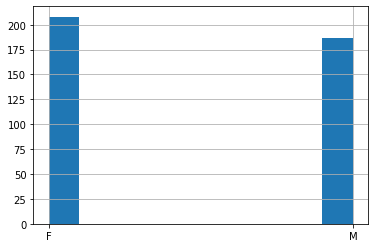

In [7]:
# Распределение между девушками юношами
stud.sex.hist();

sex  age
F    15     AxesSubplot(0.125,0.125;0.775x0.755)
     16     AxesSubplot(0.125,0.125;0.775x0.755)
     17     AxesSubplot(0.125,0.125;0.775x0.755)
     18     AxesSubplot(0.125,0.125;0.775x0.755)
     19     AxesSubplot(0.125,0.125;0.775x0.755)
     20     AxesSubplot(0.125,0.125;0.775x0.755)
M    15     AxesSubplot(0.125,0.125;0.775x0.755)
     16     AxesSubplot(0.125,0.125;0.775x0.755)
     17     AxesSubplot(0.125,0.125;0.775x0.755)
     18     AxesSubplot(0.125,0.125;0.775x0.755)
     19     AxesSubplot(0.125,0.125;0.775x0.755)
     20     AxesSubplot(0.125,0.125;0.775x0.755)
     21     AxesSubplot(0.125,0.125;0.775x0.755)
     22     AxesSubplot(0.125,0.125;0.775x0.755)
Name: age, dtype: object

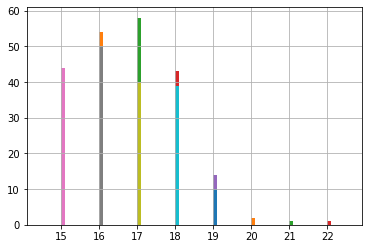

In [8]:
stud.groupby(['sex','age']).age.hist()

##### Выводы по колонке sex:
- По количеству: перевес в сторону девушек
- По возрасту: самые старшие (возраст 21 и 22 года) - только юноши

#### 3 age — возраст ученика (от 15 до 22)

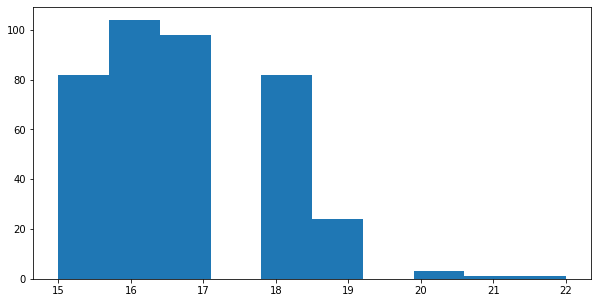

In [9]:
# Распределение по кол-ву
stud.age.hist(grid=False, xlabelsize=10, ylabelsize=10, figsize=(10,5))

In [10]:
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

##### Выводы по колонке age:
- Распределение по возрасту неравномерное
- Если брать во внимание только (15 лет <= возраст < 20 лет), тогда распределение примерно колоколообразное

### Остальные 27 колонок - с пропуском

#### 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

U    295
R     83
Name: address, dtype: int64

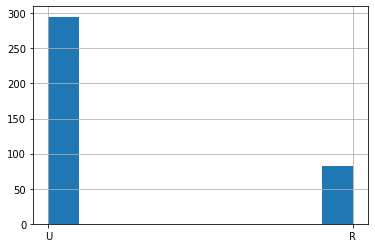

In [11]:
# 395 - 378 = 17 пропусков
# Распределение
stud.address.hist()
stud.address.value_counts()

Распределение похоже на распределение по виду школ.

Посмотрим как соотносятся виды школ и адресов

school  address
GP      R          AxesSubplot(0.125,0.125;0.775x0.755)
        U          AxesSubplot(0.125,0.125;0.775x0.755)
MS      R          AxesSubplot(0.125,0.125;0.775x0.755)
        U          AxesSubplot(0.125,0.125;0.775x0.755)
Name: address, dtype: object

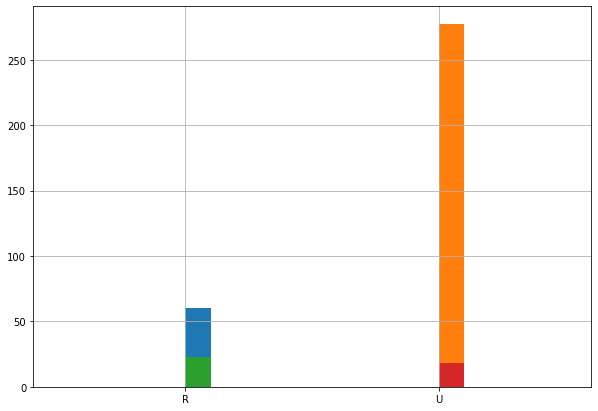

In [12]:
stud.groupby(['school', 'address']).address.hist(figsize=(10,7))

In [13]:
stud[['school', 'sex', 'age', 'address']].loc[stud.address.isnull()]

,school,sex,age,address
6,GP,M,16,NaN
52,GP,M,15,NaN
75,GP,M,15,NaN
92,GP,F,16,NaN
96,GP,M,16,NaN
159,GP,M,16,NaN
168,GP,F,16,NaN
241,GP,M,17,NaN
254,GP,M,17,NaN
270,GP,F,19,NaN


##### Предположение: 
поскольку пропусков всего 17, т.е. <5%, заполним их значением, которое представлено максимальным значением в распределении - это "U"

In [14]:
stud.address = stud.address.apply(lambda x: 'U' if pd.isnull(x) else x)

##### Выводы по колонке address:
- Заполнили пропуски значением "U", т.к. это значение встречается чаще всего

#### 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

27


GT3    261
LE3    107
Name: famsize, dtype: int64

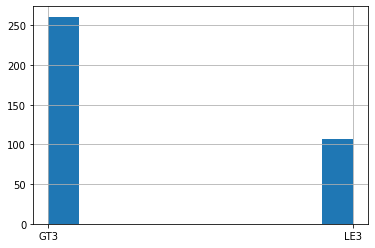

In [15]:
stud.famsize.hist();
print(stud.famsize.isnull().sum())
stud.famsize.value_counts()

In [16]:
# Соотношение GT3/LE3 ~ 2
stud.famsize.value_counts()[0] / stud.famsize.value_counts()[1]

2.439252336448598

school  famsize
GP      GT3        233
        LE3         91
MS      GT3         28
        LE3         16
Name: famsize, dtype: int64

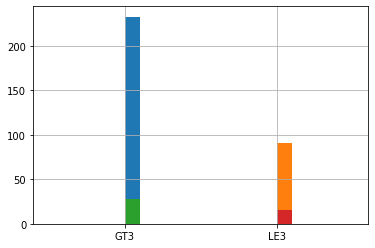

In [17]:
stud.groupby(['school', 'famsize']).famsize.hist()
stud.groupby(['school', 'famsize']).famsize.count()

sex  famsize
F    GT3        148
     LE3         49
M    GT3        113
     LE3         58
Name: famsize, dtype: int64

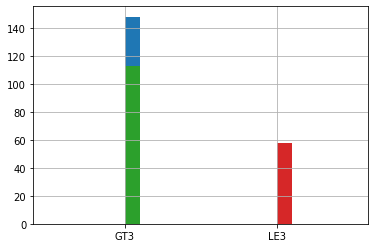

In [18]:
stud.groupby(['sex', 'famsize']).famsize.hist()
stud.groupby(['sex', 'famsize']).famsize.count()

age  famsize
15   GT3        57
     LE3        20
16   GT3        70
     LE3        28
17   GT3        64
     LE3        26
18   GT3        48
     LE3        27
19   GT3        18
     LE3         5
20   GT3         2
     LE3         1
21   GT3         1
22   GT3         1
Name: famsize, dtype: int64

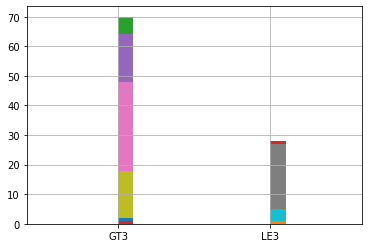

In [19]:
stud.groupby(['age', 'famsize']).famsize.hist()
stud.groupby(['age', 'famsize']).famsize.count()

address  famsize
R        GT3         58
         LE3         18
U        GT3        203
         LE3         89
Name: famsize, dtype: int64

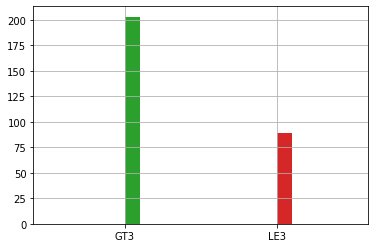

In [20]:
stud.groupby(['address', 'famsize']).famsize.hist()
stud.groupby(['address', 'famsize']).famsize.count()

Общее соотношение GT3/LE3 примерно равно 2.

Среди юношей и девушек соотношение GT3/LE3 также примерно равно 2. Заполним пропуски, беря во внимание пол и это соотношение. То есть для каждого пола наугад заполним GT3 и LE3 таким образом, чтобы было GT3:LE3 как 2:1.

In [21]:
# Найдем индексы для девушек: f_idx_GT3 - индексы, куда будем писать 'GT3', f_idx_LE3 - 'LE3'
print('Female:')
f_idx = stud[['sex','famsize']].loc[(stud.sex == 'F') & (stud.famsize.isnull())].index
print(f_idx)
f_idx_GT3 = f_idx[0:round(2/3*len(f_idx))]
print(f_idx_GT3)
f_idx_LE3 = pd.Index(set(f_idx) - set(f_idx_GT3))
print(f_idx_LE3)

# Аналогичные индексы для юношей
print('Male:')
m_idx = stud[['sex','famsize']].loc[(stud.sex == 'M') & (stud.famsize.isnull())].index
print(m_idx)
m_idx_GT3 = m_idx[0:round(2/3*len(m_idx))]
print(m_idx_GT3)
m_idx_LE3 = pd.Index(set(m_idx) - set(m_idx_GT3))
print('m_idx_LE3 =', m_idx_LE3)

# Объединяем одинаковые индексы
idx_GT3 = pd.Index(set(f_idx_GT3).union(set(m_idx_GT3)))
idx_LE3 = pd.Index(set(f_idx_LE3).union(set(m_idx_LE3)))

Female:
Int64Index([0, 79, 167, 195, 202, 221, 237, 313, 344, 360, 367], dtype='int64')
Int64Index([0, 79, 167, 195, 202, 221, 237], dtype='int64')
Int64Index([360, 313, 344, 367], dtype='int64')
Male:
Int64Index([9, 32, 36, 76, 78, 114, 128, 129, 172, 228, 235, 252, 253, 254,
            268, 280],
           dtype='int64')
Int64Index([9, 32, 36, 76, 78, 114, 128, 129, 172, 228, 235], dtype='int64')
m_idx_LE3 = Int64Index([268, 280, 252, 253, 254], dtype='int64')


In [22]:
# Заполняем 'GT3'
stud.loc[idx_GT3, 'famsize'] = 'GT3'
stud.iloc[idx_GT3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
128,GP,M,18,R,GT3,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,GT3,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0
195,GP,F,17,U,GT3,T,2.0,NaN,services,services,course,father,1.0,2.0,0.0,no,NaN,no,yes,yes,-6.0,yes,yes,yes,NaN,3.0,2.0,5.0,0.0,75.0
9,GP,M,15,U,GT3,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
202,GP,F,17,U,GT3,T,1.0,1.0,other,other,course,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,no,no,4.0,4.0,NaN,1.0,4.0,50.0
76,GP,M,15,U,GT3,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,GT3,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
221,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,reputation,mother,1.0,3.0,1.0,no,yes,no,yes,yes,-9.0,yes,no,yes,4.0,3.0,NaN,5.0,0.0,0.0


In [23]:
# Заполняем 'LE3'
stud.loc[idx_LE3, 'famsize'] = 'LE3'
stud.iloc[idx_LE3]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
280,GP,M,17,U,LE3,A,4.0,NaN,services,other,home,mother,2.0,1.0,NaN,no,no,yes,yes,yes,-3.0,yes,yes,NaN,4.0,NaN,4.0,5.0,30.0,40.0
360,MS,F,18,R,LE3,A,1.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,no,yes,NaN,3.0,4.0,5.0,0.0,65.0
268,GP,M,18,U,LE3,NaN,4.0,2.0,NaN,other,reputation,father,NaN,2.0,0.0,no,NaN,yes,yes,yes,-6.0,yes,yes,yes,5.0,4.0,5.0,5.0,10.0,50.0
367,MS,F,17,R,LE3,T,1.0,1.0,other,services,reputation,mother,3.0,1.0,1.0,no,yes,yes,no,yes,-3.0,yes,yes,yes,5.0,2.0,1.0,1.0,0.0,0.0
344,GP,F,18,U,LE3,T,2.0,3.0,at_home,other,course,NaN,1.0,3.0,NaN,no,yes,no,no,yes,-9.0,yes,yes,no,4.0,3.0,3.0,3.0,4.0,50.0
313,GP,F,19,U,LE3,NaN,3.0,2.0,services,other,reputation,other,2.0,2.0,NaN,no,NaN,NaN,no,no,-6.0,yes,yes,yes,4.0,2.0,2.0,1.0,22.0,55.0
252,GP,M,18,U,LE3,NaN,2.0,1.0,services,services,other,mother,1.0,1.0,1.0,no,no,no,no,no,-3.0,no,yes,no,3.0,2.0,5.0,5.0,4.0,40.0
253,GP,M,16,R,LE3,T,2.0,1.0,other,other,course,mother,2.0,1.0,0.0,no,no,NaN,yes,no,-3.0,yes,no,no,3.0,3.0,2.0,3.0,0.0,40.0
254,GP,M,17,U,LE3,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0


In [24]:
stud.famsize.isnull().sum()

0

##### Выводы по колонке famsize:
- Заполнили пропуски по алгоритму, описанному выше

#### 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

T    314
A     36
Name: Pstatus, dtype: int64


45

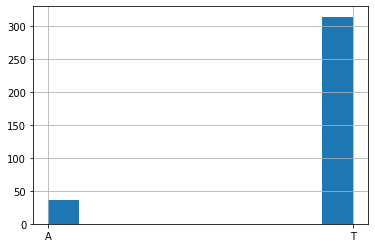

In [30]:
stud.Pstatus.hist();
print(stud.Pstatus.value_counts())
stud.Pstatus.isnull().sum()

Посмотрим, как признак связан с возрастом. Предположим, что старше какого-то возраста все живут отдельно.

In [31]:
stud.groupby(['Pstatus', 'age']).age.count()

Pstatus  age
A        15     10
         16      8
         17      9
         18      5
         19      2
         20      2
T        15     63
         16     82
         17     81
         18     67
         19     18
         20      1
         21      1
         22      1
Name: age, dtype: int64

Предположение не подтвердилось: все возрасты живут как вместе с родителями, так и раздельно. А самые возрастные - 21 и 22 года - так те только с родителями.

Поэтому пропуски заполним значением 'T', как максимально представленным в выборке.

In [35]:
# Получим индексы с пропусками в признаке Pstatus
Pstatus_null_idx = stud.loc[stud.Pstatus.isnull()].index
# Заполним пропуски
stud.loc[Pstatus_null_idx, 'Pstatus'] = 'T'
# Проверка
stud.Pstatus.isnull().sum()

0

##### Выводы по колонке Pstatus:
- Все возрасты живут как вместе с родителями, так и раздельно со значительным преобладанием "с родителями".
- Все пропуски заполнены значением 'T', как максимально представленным в выборке.

#### 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64


3

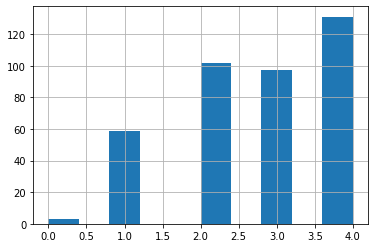

In [37]:
stud.Medu.hist();
print(stud.Medu.value_counts())
stud.Medu.isnull().sum()

Как ни странно, мамы с высшим образованием в абсолютном большинстве. Прпоусков всего 3.

А как этот признак=NaN соотносится с первыми тремя максимально заполненными колонками?

In [41]:
stud[['school', 'sex', 'age', 'Medu']].loc[stud.Medu.isnull()]

,school,sex,age,Medu
92,GP,F,16,NaN
193,GP,M,16,NaN
239,GP,M,18,NaN


Ввиду того, что пропусков мало, посмотрим как выглядят колонки с заполненным Medu и фиксированных ['school', 'sex', 'age']

2.0    19
4.0    16
3.0    13
1.0     5
Name: Medu, dtype: int64

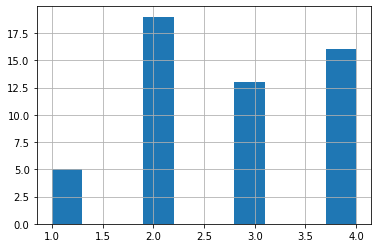

In [43]:
# GP	F	16 --> MeduMax = 2
stud.loc[(stud.school == 'GP') & (stud.sex == 'F') & (stud.age == 16)].Medu.hist();
stud.loc[(stud.school == 'GP') & (stud.sex == 'F') & (stud.age == 16)].Medu.value_counts()

4.0    19
3.0    13
2.0    11
1.0     5
0.0     1
Name: Medu, dtype: int64

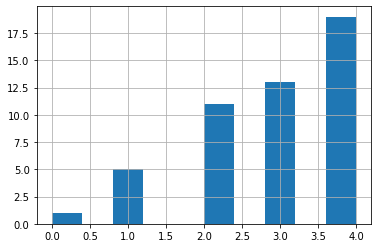

In [44]:
# GP	M	16 --> MeduMax = 4
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 16)].Medu.hist();
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 16)].Medu.value_counts()

4.0    11
2.0     8
3.0     7
1.0     1
Name: Medu, dtype: int64

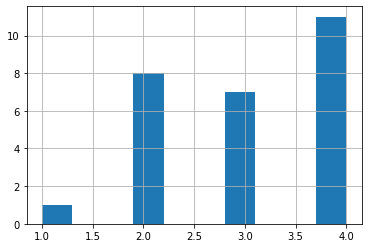

In [45]:
# GP	M	18 --> MeduMax = 4
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 18)].Medu.hist();
stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 18)].Medu.value_counts()

Заполним пропуски, исходя из максимальных значений признака Medu при фиксированных значениях признаков school, sex, age (см. анализ выше)

In [51]:
# GP	F	16 --> MeduMax = 2
idx = stud.loc[(stud.school == 'GP') & (stud.sex == 'F') & (stud.age == 16) & 
               (stud.Medu.isnull())].Medu.index
stud.loc[idx, 'Medu'] = 2

# GP	M	16 --> MeduMax = 4
idx = stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 16) & 
               (stud.Medu.isnull())].Medu.index
stud.loc[idx, 'Medu'] = 4


# GP	M	18 --> MeduMax = 4
idx = stud.loc[(stud.school == 'GP') & (stud.sex == 'M') & (stud.age == 18) & 
               (stud.Medu.isnull())].Medu.index
stud.loc[idx, 'Medu'] = 4

stud.Medu.isnull().sum()

0

##### Выводы по колонке Medu
- Пропусков всего 3.
- Заполнили пропуски, исходя из максимальных значений признака Medu при фиксированных значениях признаков school, sex, age.

#### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


24

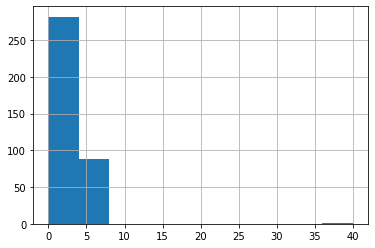

In [54]:
stud.Fedu.hist();
print(stud.Fedu.value_counts())
stud.Fedu.isnull().sum()

О, с образованием пап дела обстоят иначе.

Пропусков 24. 

И здесь имеется выброс. Судя по значению выброса, скорее всего это описка при записи значения = 4. Сначала исправим этот выброс с 40 на 4.

In [57]:
idx = stud.Fedu.loc[stud.Fedu == 40]
stud.loc[idx, 'Fedu'] = 4

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64


24

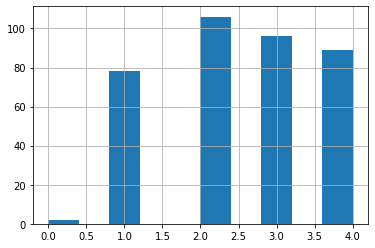

In [59]:
# Снова построим распределение, уже без выброса
stud.Fedu.hist();
print(stud.Fedu.value_counts())
stud.Fedu.isnull().sum()

Преобладает значение 2. Ввиду некоторой колоколообразности, заменим все пропуски на 2 - в каком-то смысле на среднее значение.

In [61]:
Fedu_null_idx = stud.loc[stud.Fedu.isnull()].index
stud.loc[Fedu_null_idx, 'Fedu'] = 2
# Проверка после замены
stud.Fedu.isnull().sum()

0

##### Выводы по колонке Fedu
- Был выброс, который заменили на подходящее значение, исходя из общих соображений. Скорее всего справа случайно был приписан 0.
- В остальном все пропуски заменили на среднее значение = 2, исходя из вида распределения

#### 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64


19

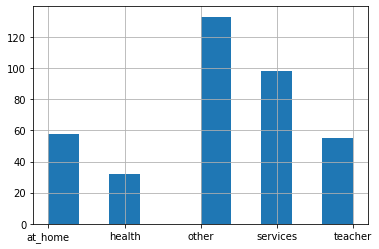

In [62]:
stud.Mjob.hist();
print(stud.Mjob.value_counts())
stud.Mjob.isnull().sum()

In [63]:
# Исходя из вида распределения, все пропуски заменим на среднее значение = 'other'
Mjob_null_idx = stud.loc[stud.Mjob.isnull()].index
stud.loc[Mjob_null_idx, 'Mjob'] = 'other'
# Проверка после замены
stud.Mjob.isnull().sum()

0

##### Выводы по колонке Mjob
- Распределение - колоколообразное. Исходя из вида распределения, все пропуски заменили на среднее значение = 'other'

#### 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64


36

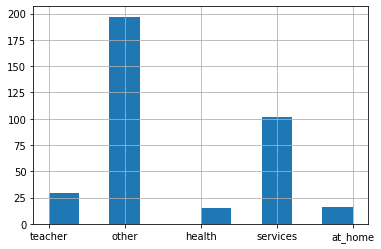

In [64]:
stud.Fjob.hist();
print(stud.Fjob.value_counts())
stud.Fjob.isnull().sum()

Распределение не колоколообразное, но значение 'other' явно выделяется. На него и заменим все пропуски

In [65]:
Fjob_null_idx = stud.loc[stud.Fjob.isnull()].index
stud.loc[Fjob_null_idx, 'Fjob'] = 'other'
# Проверка после замены
stud.Fjob.isnull().sum()

0

##### Выводы по колонке Fjob
- Исходя из вида распределения, все пропуски заменили на среднее значение = 'other'

In [ ]:
#### 

In [ ]:
##### Выводы по колонке 

In [ ]:
##### Выводы по колонке 

In [ ]:
##### Выводы по колонке 

In [ ]:
##### Выводы по колонке 

#### 21 studytime, granular — назначение колонки пока неизвестно

In [ ]:
# Переименуем колонку "studytime, granular" в колонку "studytime_gran"
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 
    'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 
    'paid', 'activities', 'nursery', 'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
    'freetime', 'goout', 'health', 'absences', 'score']
stud.columns

In [ ]:
# стоит написать функции, которые можно применять к столбцам определённого типа.

2. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
3. Оцените количество уникальных значений для номинативных переменных.
4. По необходимости преобразуйте данные
5. Проведите корреляционный анализ количественных переменных
6. Отберите не коррелирующие переменные.
7. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
8. Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем при построении модели.

## Окончательные преобразования строковых колонок в числовые

In [ ]:
# # school. Замена на числовые значения
# stud.school = stud.school.apply(lambda x: 0 if x == 'GP' else 1)

# # sex. Преобразуем значения колонки в числовые
# stud.sex = stud.sex.apply(lambda x: 0 if x == 'F' else 1)

# # address. И заменим строковые значения числовыми
# stud.address = stud.address.apply(lambda x: 0 if x=='U' else 1)

# - school. Заменили строковые значения на числовые: GP=0, MS=1
# - sex. Заменили строковые значения на числовые: F=0, M=1
# - address. Заменили строковые значения на числовые: U=0, R=1


Если будет время, можно позапускать модельки. Только без создания новых признаков.
Если подойдет, можно попробовать метрику ROC AUC

# Промежуточные выводы

# Основные итоги работы

# *Дополнительно:
оставьте комментарий по своей работе для ментора.

In [ ]:
# 23.05.2020 - 3 ч.
# 24.05.2020 - 1 ч.
# 25.05.2020 - 1.5 ч.
